### Lane Line Detection

In this project I created a software pipeline in Python to detect lane lines in images and effectively a video stre

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob # Library to read in files with a consistent filename 
%matplotlib inline

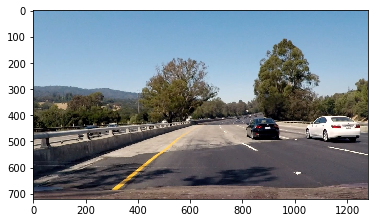

In [50]:
# Read in a calibration image
test_img = mpimg.imread('./test_images/test4.jpg')
plt.imshow(test_img)

In [7]:
# %matplotlib qt

cal_images = glob.glob('camera_cal/calibration*.jpg')

# Prepare object points like (0,0,0), (1, 0, 0), (2, 0, 0), ...., (8, 5, 0)
objp = np.zeros((6*9, 3), np.float32) # Initialize all to 0

# Use numpy's mgrid function to generate points https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.mgrid.html
objp[:, :2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2) # x, y coordinates only

def load_points(images):
    # Arrays to store object points and image points from all the images

    objpoints = [] # 3D points in real world space
    imgpoints = [] # 2D points in image space
    for fname in images:
        # Read in image
        img = mpimg.imread(fname)

        # Convert image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp)
            
#             cv2.drawChessboardCorners(img, (9,6), corners, ret)
#             cv2.imshow('img', img)
#             cv2.waitKey(500)
    return objpoints, imgpoints
        
objpoints, imgpoints = load_points(cal_images)

In [55]:
def undistort_image(img, objpoints, imgpoints):
    img_size = (img.shape[1], img.shape[0])
    
    # Calibrate the camera 
    ret, camera_matrix, distortion_coefficients, rotation_vectors, translation_vectors = \
        cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

    # Undistort the image
    undistorted_img = cv2.undistort(img, camera_matrix, distortion_coefficients, None, camera_matrix)
    
    return undistorted_img

undistorted = undistort_image(test_img, objpoints, imgpoints)

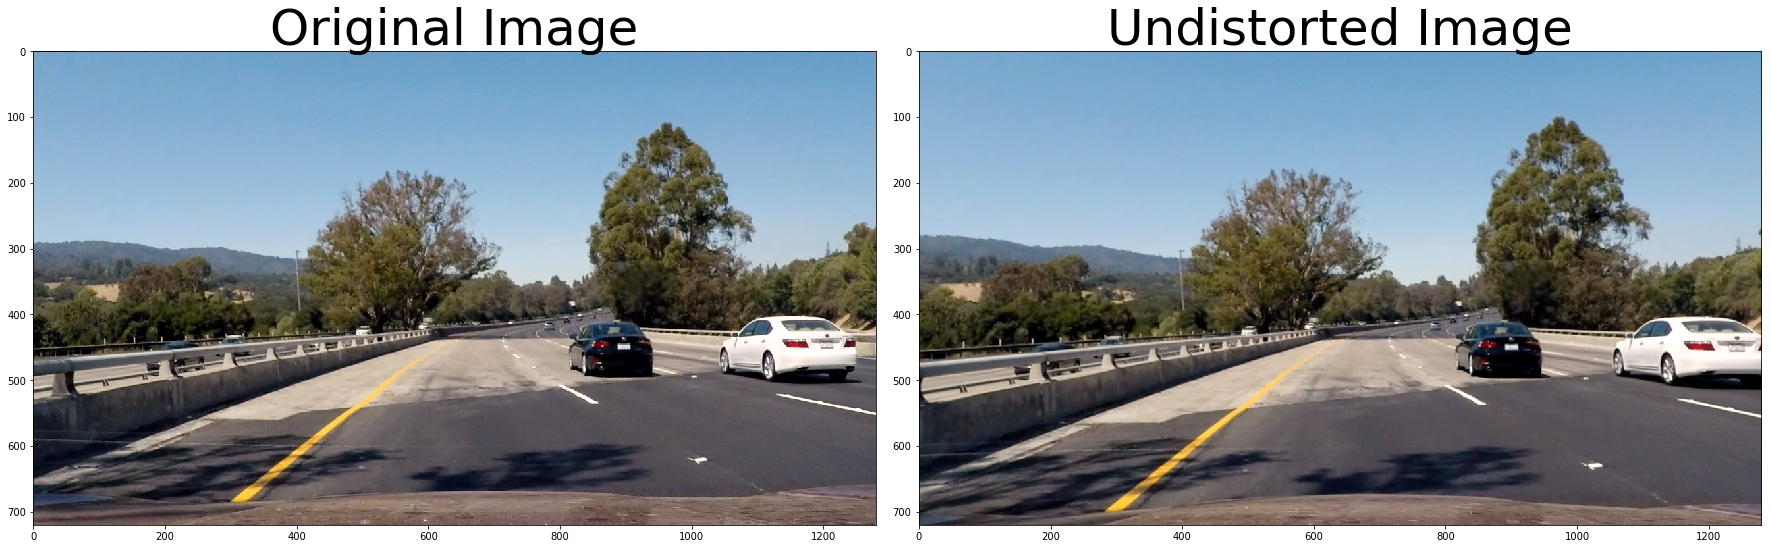

In [56]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(test_img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

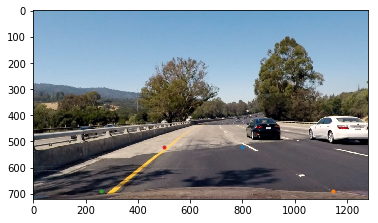

In [57]:
# Read in a test image for perspective transform and plot points
%matplotlib inline

plt.imshow(undistorted)
plt.plot(800, 520, '.') # Top right
plt.plot(1145, 690, '.') # Bottom right
plt.plot(260, 690, '.') # Bottom left
plt.plot(500, 520, '.') # Top left


In [58]:
def warp(img):
    img_size = (img.shape[1], img.shape[0])
    
    # Four source coordinates
    src = np.float32(
        [[800, 520],
         [1145, 690],
         [260, 690],
         [500, 520]])
    
    dst = np.float32(
        [[1000, 200],
         [1000, 650],
         [400, 650],
         [400, 200]])
    
    M = cv2.getPerspectiveTransform(src, dst) # mapping as perspective matrix
    
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped

warped_img = warp(undistorted)

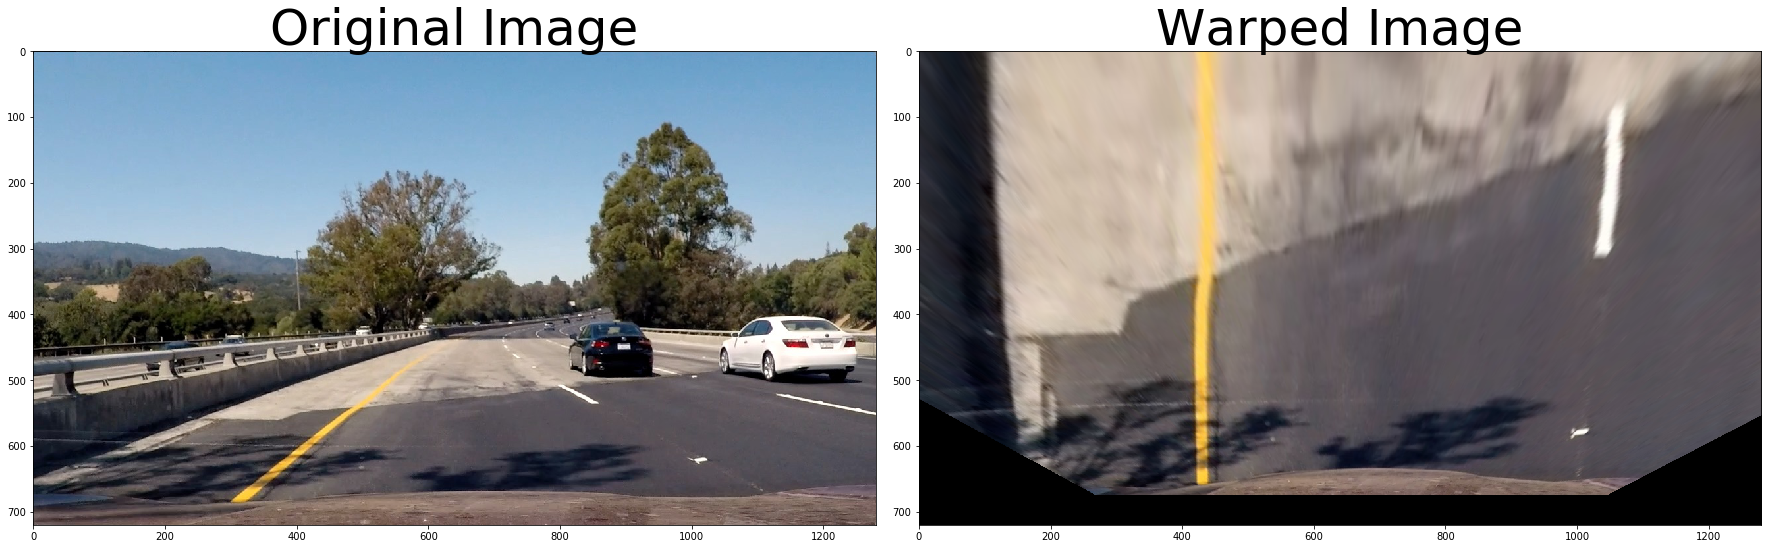

In [59]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(test_img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(warped_img)
ax2.set_title('Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)